# **Clustering With K Means**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('salary.csv')
df

,Income,Age
0,50000,45
1,70000,30
2,40000,55
3,65000,30
4,77000,59
5,85000,39
6,55000,68
7,49000,45
8,93000,24
9,50000,30


In [17]:
df.head()

,Income,Age
0,50000,45
1,70000,30
2,40000,55
3,65000,30
4,77000,59


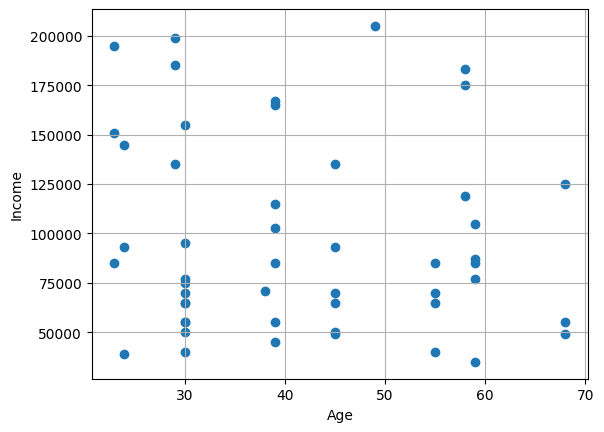

In [18]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
y_predi = km.predict([['18', '90000']])
y_predi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [21]:
df['cluster'] = y_pred
df.head(30)

,Income,Age,cluster
0,50000,45,0
1,70000,30,0
2,40000,55,0
3,65000,30,0
4,77000,59,0
5,85000,39,0
6,55000,68,0
7,49000,45,0
8,93000,24,0
9,50000,30,0


In [22]:
km.cluster_centers_

array([[4.23823529e+01, 6.77352941e+04],
       [4.00000000e+01, 1.59625000e+05]])

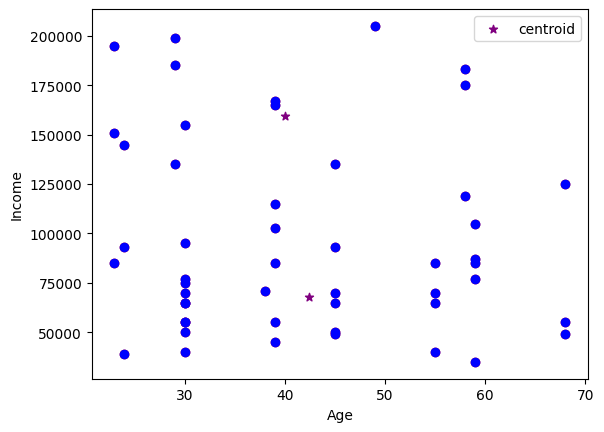

In [28]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
plt.scatter(df['Age'], df['Income'], color="red")
plt.scatter(df['Age'], df['Income'], color="blue")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

# **Preprocessing Using Min Max Scaler**

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [33]:
df.head()

,Income,Age,cluster
0,0.088235,0.488889,0
1,0.205882,0.155556,0
2,0.029412,0.711111,0
3,0.176471,0.155556,0
4,0.247059,0.800000,0


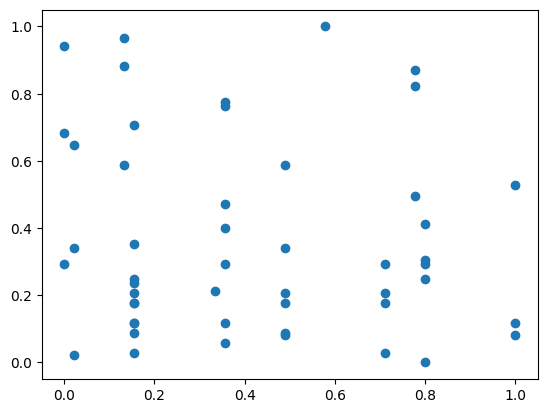

In [35]:
plt.scatter(df['Age'], df['Income'])
plt.show()

In [37]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

In [38]:
df['cluster'] = y_pred
df.head()

,Income,Age,cluster
0,0.088235,0.488889,0
1,0.205882,0.155556,0
2,0.029412,0.711111,1
3,0.176471,0.155556,0
4,0.247059,0.800000,1


In [39]:
km.cluster_centers_

array([[0.25648148, 0.20220588],
       [0.81709402, 0.24524887],
       [0.3008547 , 0.78733032]])

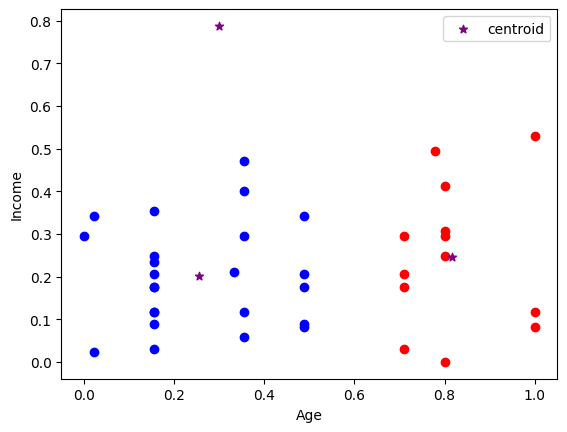

In [41]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]

plt.scatter(df1['Age'], df1['Income'], color="blue")
plt.scatter(df2['Age'], df2['Income'], color="red")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

# **Elbow Plot**

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

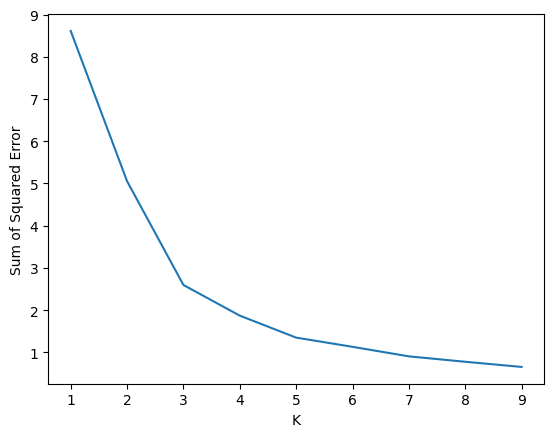

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)